Описание в: 'doc/w3_03_statement-svm.pdf'

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_answer(name, value):
    with open('data/statement-svm_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [3]:
df = pd.read_csv('data/svm-data.csv', header=None)

In [4]:
df.head()

,0,1,2
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39


In [5]:
X = df[[1,2]]
y = df[0]

In [6]:
clf = SVC(C = 100000, kernel = 'linear', random_state=241)

In [7]:
clf.fit(X, y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
support = df[df.index.isin(clf.support_)]

support

,0,1,2
3,0.0,0.98,0.68
4,0.0,0.48,0.39
9,1.0,0.53,0.53


In [9]:
clf.support_vectors_

array([[ 0.98,  0.68],
       [ 0.48,  0.39],
       [ 0.53,  0.53]])

In [10]:
clf.coef_[0]

array([-10.4526212 ,  18.02446131])

In [11]:
def clf_fun(x, clf=clf):
    return (1/clf.coef_ [0][1])*( -clf.intercept_[0] - clf.coef_ [0][0]*x)

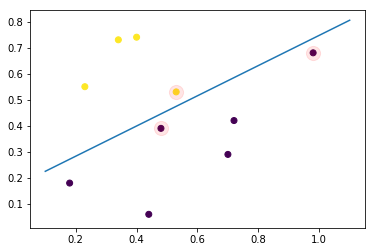

In [12]:
plt.scatter(df[1], df[2], c=df[0])
plt.scatter(support[1], support[2], c='red', alpha=0.1, s=200)
plt.plot(np.linspace(0.1, 1.1, 100), list(map(clf_fun, np.linspace(0.1, 1.1, 100))))

In [13]:
pd.DataFrame({'predict': clf.predict(X), 'true': y})

,predict,true
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0


In [16]:
answer = ','.join([str(el+1) for el in clf.support_])

answer

'4,5,10'

In [17]:
save_answer('1', answer)